In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
classification_df = pd.read_csv("classification.csv")
regression1_df = pd.read_csv("regression_1.csv")
regression2_df = pd.read_csv("regression_2.csv")


In [3]:
classification_df

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


<Axes: xlabel='x1', ylabel='x2'>

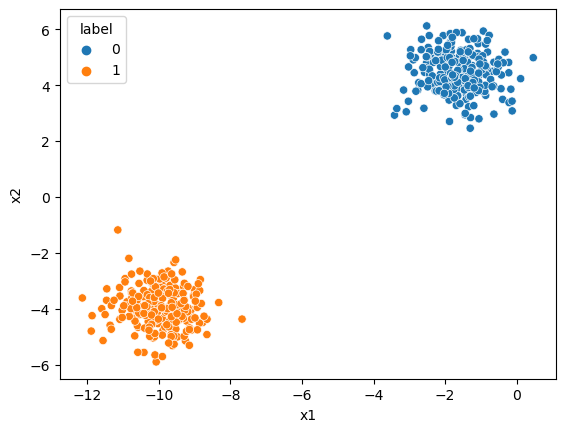

In [4]:
sns.scatterplot(data=classification_df, x='x1', y='x2', hue='label')

In [5]:

regression1_df

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342
...,...,...
58,5.8,-0.930421
59,5.9,-1.674052
60,6.0,-0.473458
61,6.1,-1.529905


In [6]:
regression1_df.describe()

,x1,x2
count,63.00000,63.000000
mean,3.10000,-0.016079
std,1.83303,1.167700
min,0.00000,-2.112807
25%,1.55000,-0.868252
50%,3.10000,-0.043282
75%,4.65000,0.865807
max,6.20000,2.281413


<Axes: xlabel='x1', ylabel='x2'>

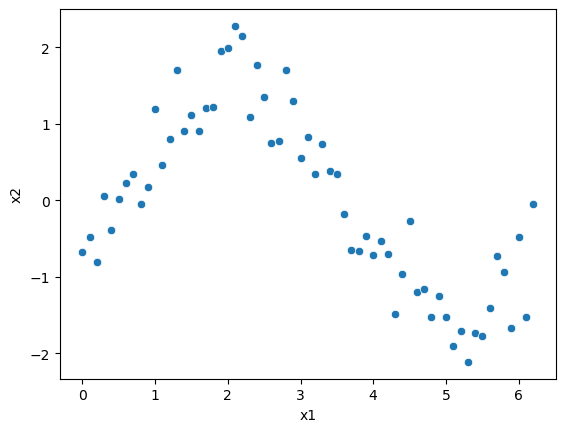

In [7]:
sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])

<Axes: xlabel='x1', ylabel='x2'>

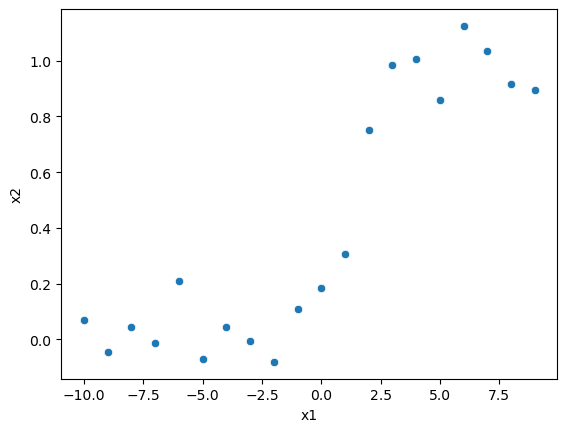

In [136]:
sns.scatterplot(data=regression2_df,x=regression2_df["x1"],y=regression2_df["x2"])

# TASK 2

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np

In [13]:
def linear_function(x,m,b):
    """Returns the equation of a linear function given x, slope(m), and intercept(b)"""
    return m*x + b


In [93]:
x = np.arange(-15,0,0.5)
@interact(m=(-5.0,5.0,0.25),b=(-10.0,0,0.5))
def fitting_line(m=0,b=0):
    y = linear_function(x,m,b)
    plt.plot(x,y)
    sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
    plt.xlim([-16,1])
    plt.ylim([-8,8])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0, step=0.25), FloatSlider(value…

In [43]:
from scipy.optimize import minimize
import math

In [48]:
math.sin(math.pi/2)

1.0

In [73]:
def quadratic_function(x,a,b,c):
    return a*x*x + b*x + c
def degrees_to_radians(x):
    return (math.pi/180)*x


In [57]:
def reduce_MSE(params, x_data, y_data):
    """function to reduce mean squared error"""
    
    return ((y - sine_function(x,a))**2).sum()

In [78]:
sine_function(45,1,1,0)

0.7071067811865476

In [123]:
x = np.arange(-1,7,0.25)
@interact(a=(-6.0,6.0,0.25),b=(0,5,0.25),c=(-5,5,0.5))
def fitting_line(a=0,b=0,c=0):
    y = sine_function(x,a,b,c)
    plt.plot(x,y)
    sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
    plt.xlim([-1,7])
    plt.ylim([-6,4])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0, step=0.25), FloatSlider(value…

In [33]:
from scipy.optimize import curve_fit

In [34]:
def sine_function(x,A,B,C):
    return A*np.sin(B*x+C)

In [35]:
popt1, pcov1 = curve_fit(sine_function, regression1_df["x1"], regression1_df["x2"])

In [37]:
popt1

array([ 1.55867731,  1.02759923, -0.56002132])

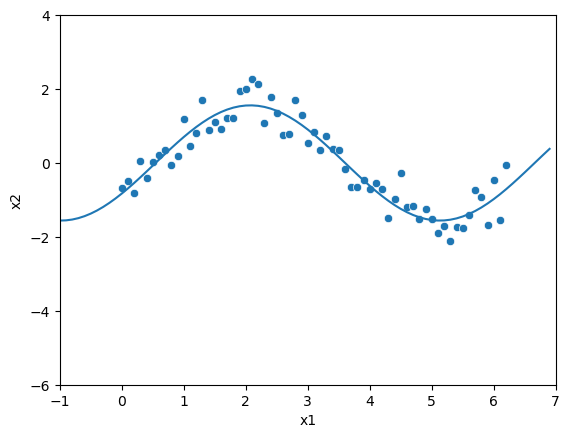

In [36]:
x1 = np.arange(-1,7,0.1)
y1 = sine_function(x1,*popt1)
plt.plot(x1,y1)
sns.scatterplot(data=regression1_df,x=regression1_df["x1"],y=regression1_df["x2"])    
plt.xlim([-1,7])
plt.ylim([-6,4])
plt.show()

In [39]:
def logistical_function(x,a,b):
    return a/(1+np.exp(x*-b))

In [40]:
popt2, pcov2 = curve_fit(logistical_function, regression2_df["x1"], regression2_df["x2"])

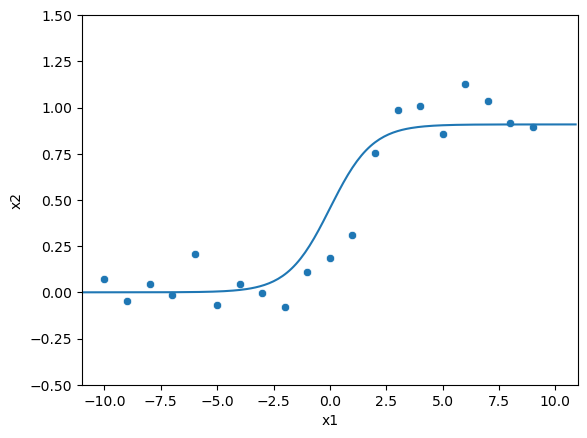

In [41]:
x2 = np.arange(-11,11,0.1)
y2 = logistical_function(x,*popt2)
plt.plot(x2,y2)
sns.scatterplot(data=regression2_df,x=regression2_df["x1"],y=regression2_df["x2"])    
plt.xlim([-11,11])
plt.ylim([-0.5,1.5])
plt.show()

In [42]:
popt2

array([0.90853394, 1.0609857 ])

In [14]:
classification_df

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


<Axes: >

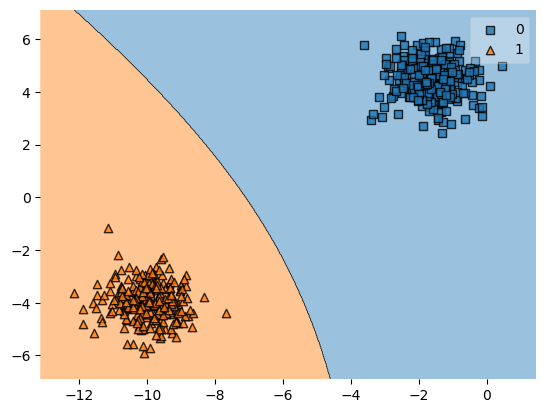

In [18]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
X3 = np.c_[classification_df["x1"],classification_df["x2"]]
y3 = classification_df["label"]
svm = SVC(kernel='poly',degree=2)
svm.fit(X3,y3)
plot_decision_regions(X3,np.asarray(y3),clf=svm)